In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

df = pd.read_csv(online_retail.csv')
df.head()






,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Kích thước dữ liệu
df.shape

# Xem 5 dòng đầu
df.head()

# Thông tin tổng quát
df.info()

# Danh sách cột
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Số lượng giá trị khuyết
missing_count = df.isnull().sum()

# Tỷ lệ khuyết (%)
missing_percent = df.isnull().mean() * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing Percent (%)": missing_percent
})

missing_df


,Missing Count,Missing Percent (%)
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.268311
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135080,24.926694
Country,0,0.000000


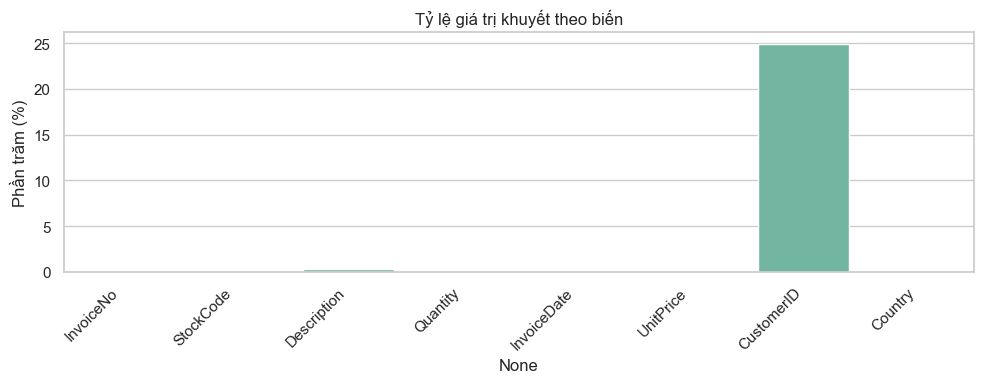

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(
    x=missing_df.index,
    y=missing_df["Missing Percent (%)"]
)
plt.xticks(rotation=45, ha="right")
plt.title("Tỷ lệ giá trị khuyết theo biến")
plt.ylabel("Phần trăm (%)")
plt.tight_layout()
plt.show()



In [ ]:
numeric_desc = df.describe()
numeric_desc


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
categorical_desc = df.describe(include="object")
categorical_desc


,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,United Kingdom
freq,1114,2313,2369,1114,495478


In [ ]:
# 1. Loại bỏ hóa đơn bị huỷ (InvoiceNo bắt đầu bằng "C")
df_clean = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

# 2. Loại bỏ các dòng có Quantity <= 0
df_clean = df_clean[df_clean["Quantity"] > 0]

# 3. Loại bỏ các dòng có UnitPrice <= 0
df_clean = df_clean[df_clean["UnitPrice"] > 0]

# 4. Loại bỏ các dòng thiếu mô tả sản phẩm
df_clean = df_clean[df_clean["Description"].notna()]

# Reset index cho gọn
df_clean = df_clean.reset_index(drop=True)

# Kiểm tra nhanh
df_clean.shape
df=df_clean

In [ ]:
df["Quantity"].describe()


count    530104.000000
mean         10.542037
std         155.524124
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

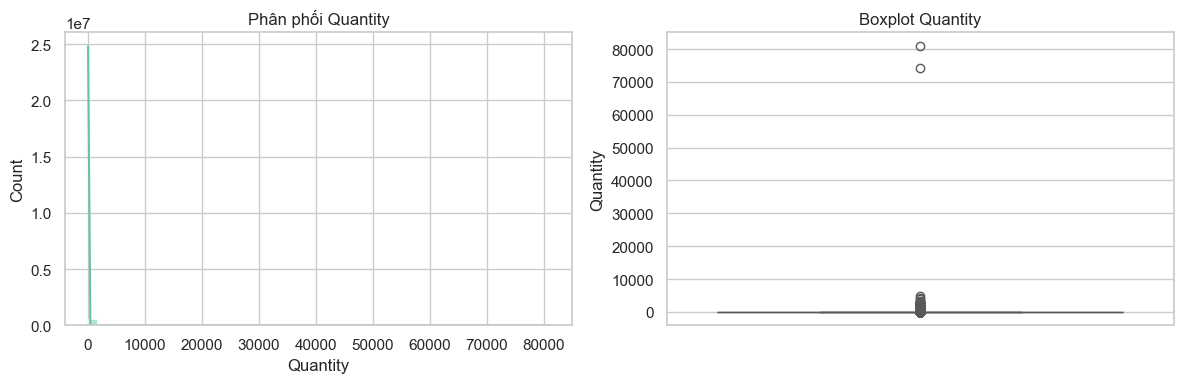

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df["Quantity"], bins=50, kde=True, ax=ax[0])
ax[0].set_title("Phân phối Quantity")

sns.boxplot(y=df["Quantity"], ax=ax[1])
ax[1].set_title("Boxplot Quantity")

plt.tight_layout()
plt.show()


In [ ]:
df["UnitPrice"].describe()


count    530104.000000
mean          3.907625
std          35.915681
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

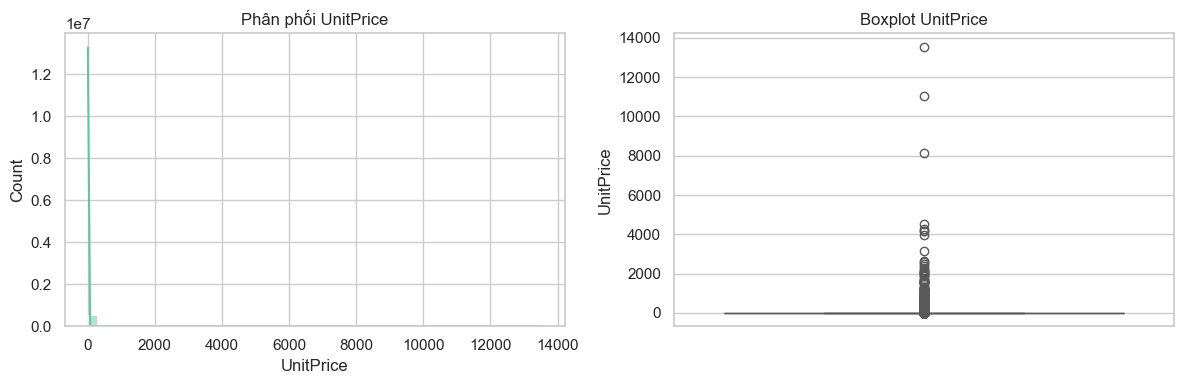

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df["UnitPrice"], bins=50, kde=True, ax=ax[0])
ax[0].set_title("Phân phối UnitPrice")

sns.boxplot(y=df["UnitPrice"], ax=ax[1])
ax[1].set_title("Boxplot UnitPrice")

plt.tight_layout()
plt.show()


In [ ]:
items_per_invoice = df.groupby("InvoiceNo")["StockCode"].count()
items_per_invoice.describe()


count    19960.000000
mean        26.558317
std         47.542066
min          1.000000
25%          6.000000
50%         15.000000
75%         29.000000
max       1114.000000
Name: StockCode, dtype: float64

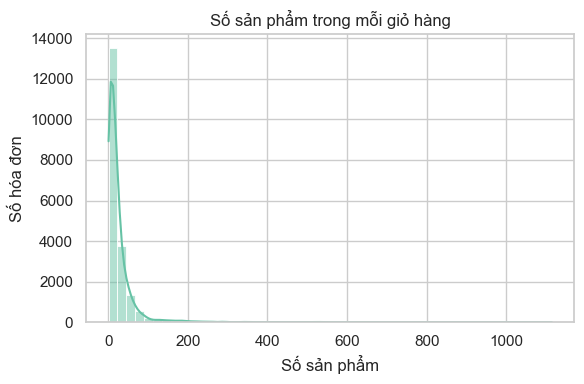

In [ ]:

plt.figure(figsize=(6,4))
sns.histplot(items_per_invoice, bins=50, kde=True)
plt.title("Số sản phẩm trong mỗi giỏ hàng")
plt.xlabel("Số sản phẩm")
plt.ylabel("Số hóa đơn")
plt.tight_layout()
plt.show()



In [ ]:
quantity_per_invoice = df.groupby("InvoiceNo")["Quantity"].sum()
quantity_per_invoice.describe()


count    19960.000000
mean       279.978758
std        955.324779
min          1.000000
25%         70.000000
50%        151.000000
75%        296.000000
max      80995.000000
Name: Quantity, dtype: float64

In [ ]:
top_items = (
    df.groupby("Description")["Quantity"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)
top_items


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
PACK OF 12 LONDON TISSUES             26135
PACK OF 60 PINK PAISLEY CAKE CASES    24854
VICTORIAN GLASS HANGING T-LIGHT       24304
ASSORTED COLOURS SILK FAN             23826
BROCADE RING PURSE                    23056
Name: Quantity, dtype: int64

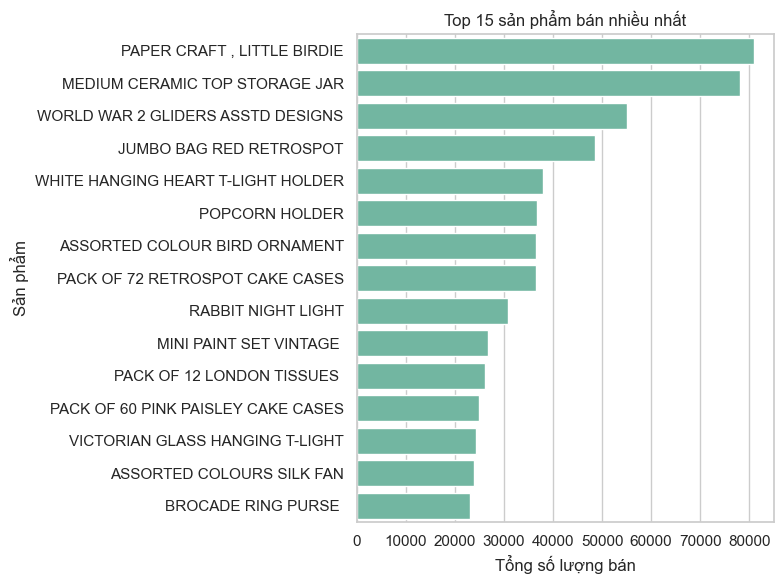

In [ ]:
top_products = (
    df.groupby("Description")["Quantity"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

plt.figure(figsize=(8,6))
sns.barplot(
    x=top_products.values,
    y=top_products.index
)
plt.title("Top 15 sản phẩm bán nhiều nhất")
plt.xlabel("Tổng số lượng bán")
plt.ylabel("Sản phẩm")
plt.tight_layout()
plt.show()


In [ ]:
item_frequency = (
    df.groupby("Description")["InvoiceNo"]
      .nunique()
      .sort_values(ascending=False)
)
item_frequency.head(15)


Description
WHITE HANGING HEART T-LIGHT HOLDER    2256
JUMBO BAG RED RETROSPOT               2089
REGENCY CAKESTAND 3 TIER              1988
PARTY BUNTING                         1685
LUNCH BAG RED RETROSPOT               1564
ASSORTED COLOUR BIRD ORNAMENT         1455
SET OF 3 CAKE TINS PANTRY DESIGN      1385
PACK OF 72 RETROSPOT CAKE CASES       1320
LUNCH BAG  BLACK SKULL.               1273
NATURAL SLATE HEART CHALKBOARD        1249
JUMBO BAG PINK POLKADOT               1218
HEART OF WICKER SMALL                 1201
JUMBO STORAGE BAG SUKI                1184
JUMBO SHOPPER VINTAGE RED PAISLEY     1175
JAM MAKING SET PRINTED                1162
Name: InvoiceNo, dtype: int64

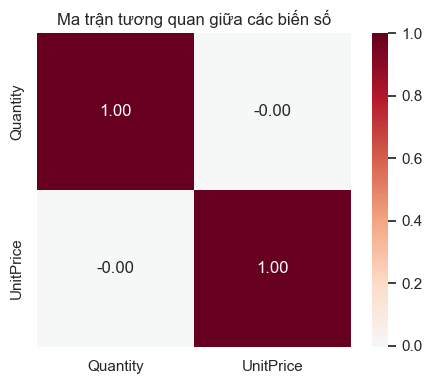

In [ ]:
numeric_cols = ["Quantity", "UnitPrice"]
corr = df[numeric_cols].corr()

plt.figure(figsize=(5,4))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    square=True
)
plt.title("Ma trận tương quan giữa các biến số")
plt.tight_layout()
plt.show()


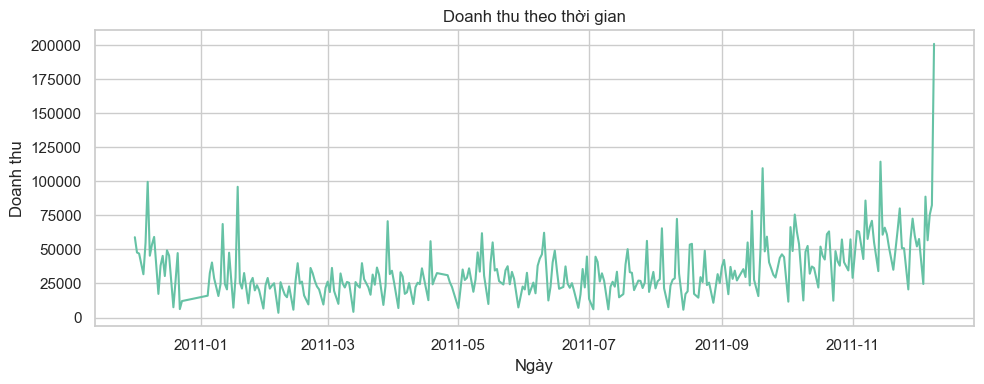

In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

daily_revenue = df.groupby(df["InvoiceDate"].dt.date)["Revenue"].sum()

plt.figure(figsize=(10,4))
plt.plot(daily_revenue)
plt.title("Doanh thu theo thời gian")
plt.xlabel("Ngày")
plt.ylabel("Doanh thu")
plt.tight_layout()
plt.show()


In [ ]:
country_transactions = df["Country"].value_counts()
country_transactions.head(10)


Country
United Kingdom    485123
Germany             9040
France              8407
EIRE                7890
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1966
Portugal            1501
Australia           1182
Name: count, dtype: int64

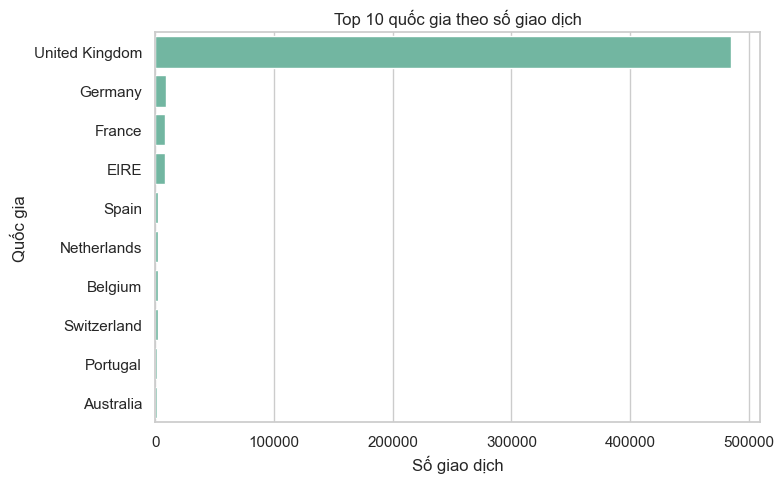

In [ ]:
top_countries = df["Country"].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index
)
plt.title("Top 10 quốc gia theo số giao dịch")
plt.xlabel("Số giao dịch")
plt.ylabel("Quốc gia")
plt.tight_layout()
plt.show()


In [ ]:
df_clean = df[
    (~df["InvoiceNo"].astype(str).str.startswith("C")) &
    (df["Quantity"] > 0) &
    (df["UnitPrice"] > 0) &
    (df["Description"].notna())
]

df_clean.shape


(530104, 10)

In [ ]:
import pandas as pd

# df đã là df_clean sau tiền xử lý
# Chỉ giữ các cột cần cho Apriori
basket_df = df[["InvoiceNo", "Description"]]

# Gom nhóm sản phẩm theo từng hóa đơn
basket = basket_df.groupby("InvoiceNo")["Description"].apply(list)


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(basket).transform(basket)

basket_encoded = pd.DataFrame(
    te_array,
    columns=te.columns_
)

basket_encoded.head()


,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(
    basket_encoded,
    min_support=0.01,
    use_colnames=True
)

# Thêm cột độ dài itemset
frequent_itemsets["length"] = frequent_itemsets["itemsets"].apply(len)

frequent_itemsets.sort_values(
    by="support",
    ascending=False
).head()


,support,itemsets,length
777,0.113026,(WHITE HANGING HEART T-LIGHT HOLDER),1
344,0.104659,(JUMBO BAG RED RETROSPOT),1
556,0.099599,(REGENCY CAKESTAND 3 TIER),1
463,0.084419,(PARTY BUNTING),1
384,0.078357,(LUNCH BAG RED RETROSPOT),1


In [ ]:
top_1_itemsets = (
    frequent_itemsets[frequent_itemsets["length"] == 1]
    .sort_values(by="support", ascending=False)
    .head(10)
)

top_1_itemsets


,support,itemsets,length
777,0.113026,(WHITE HANGING HEART T-LIGHT HOLDER),1
344,0.104659,(JUMBO BAG RED RETROSPOT),1
556,0.099599,(REGENCY CAKESTAND 3 TIER),1
463,0.084419,(PARTY BUNTING),1
384,0.078357,(LUNCH BAG RED RETROSPOT),1
50,0.072896,(ASSORTED COLOUR BIRD ORNAMENT),1
625,0.069389,(SET OF 3 CAKE TINS PANTRY DESIGN ),1
442,0.066132,(PACK OF 72 RETROSPOT CAKE CASES),1
376,0.063778,(LUNCH BAG BLACK SKULL.),1
416,0.062575,(NATURAL SLATE HEART CHALKBOARD ),1


In [ ]:
top_2_itemsets = (
    frequent_itemsets[frequent_itemsets["length"] == 2]
    .sort_values(by="support", ascending=False)
    .head(10)
)

top_2_itemsets


,support,itemsets,length
1193,0.041333,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...",2
1037,0.038427,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",2
1237,0.036273,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",2
1235,0.034068,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",2
1355,0.032114,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU...",2
843,0.032064,"(ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELI...",2
1031,0.031663,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",2
1411,0.030361,"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...",2
1533,0.029960,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",2
1124,0.029309,"(JUMBO BAG RED RETROSPOT, JUMBO BAG BAROQUE B...",2


In [ ]:
top_3_itemsets = (
    frequent_itemsets[frequent_itemsets["length"] == 3]
    .sort_values(by="support", ascending=False)
    .head(10)
)

top_3_itemsets


,support,itemsets,length
1711,0.027104,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",3
1760,0.020691,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKAD...",3
1712,0.020441,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",3
1792,0.019539,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",3
1758,0.018938,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",3
1820,0.018086,"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...",3
1710,0.017184,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",3
1757,0.017084,"(JUMBO BAG WOODLAND ANIMALS, JUMBO BAG RED RET...",3
1682,0.016834,"(RED RETROSPOT CHARLOTTE BAG, WOODLAND CHARLOT...",3
1681,0.016733,"(RED RETROSPOT CHARLOTTE BAG, STRAWBERRY CHARL...",3


In [ ]:
support_summary = (
    frequent_itemsets
    .groupby("length")["support"]
    .mean()
    .reset_index()
    .rename(columns={"length": "Itemset size", "support": "Average support"})
)

support_summary


,Itemset size,Average support
0,1,0.020868
1,2,0.013901
2,3,0.012302
3,4,0.011445
4,5,0.010220


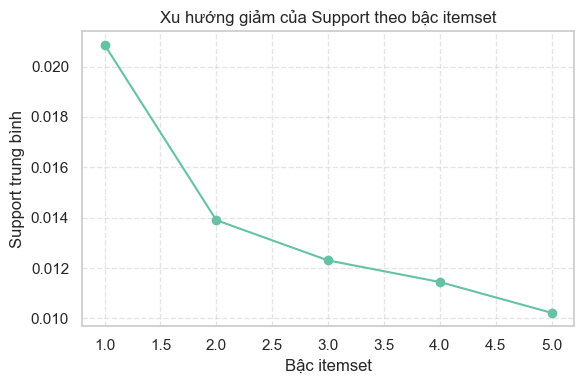

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(
    support_summary["Itemset size"],
    support_summary["Average support"],
    marker="o"
)
plt.xlabel("Bậc itemset")
plt.ylabel("Support trung bình")
plt.title("Xu hướng giảm của Support theo bậc itemset")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.3
)

rules.sort_values(
    by=["confidence", "lift"],
    ascending=False
).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
52,(BEADED CRYSTAL HEART PINK ON STICK),(DOTCOM POSTAGE),0.010321,0.035371,0.010070,0.975728,27.585742,1.0,0.009705,39.742725,0.973800,0.282700,0.974838,0.630215
932,"(JAM MAKING SET PRINTED, SUKI SHOULDER BAG)",(DOTCOM POSTAGE),0.010922,0.035371,0.010471,0.958716,27.104764,1.0,0.010085,23.365464,0.973741,0.292308,0.957202,0.627375
1059,"(HERB MARKER PARSLEY, HERB MARKER THYME)",(HERB MARKER ROSEMARY),0.010671,0.012024,0.010170,0.953052,79.262128,1.0,0.010042,21.043888,0.998034,0.812000,0.952480,0.899442
1053,"(HERB MARKER THYME, HERB MARKER BASIL)",(HERB MARKER ROSEMARY),0.010521,0.012024,0.010020,0.952381,79.206349,1.0,0.009894,20.747495,0.997873,0.800000,0.951801,0.892857
1595,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROS...",(REGENCY TEA PLATE GREEN ),0.013477,0.019088,0.012776,0.947955,49.661915,1.0,0.012518,18.847520,0.993250,0.645570,0.946943,0.808623
1060,"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010772,0.011874,0.010170,0.944186,79.518791,1.0,0.010042,17.703929,0.998176,0.815261,0.943515,0.900363
1055,"(HERB MARKER BASIL, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010721,0.011874,0.010020,0.934579,78.709728,1.0,0.009893,15.104216,0.997995,0.796813,0.933793,0.889231
292,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.011874,0.012024,0.011072,0.932489,77.552039,1.0,0.010929,14.634394,0.998967,0.863281,0.931668,0.926661
1614,"(WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...",(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.012475,0.025651,0.011573,0.927711,36.166227,1.0,0.011253,13.478490,0.984633,0.435849,0.925808,0.689441
293,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.012024,0.011874,0.011072,0.920833,77.552039,1.0,0.010929,12.481595,0.999119,0.863281,0.919882,0.926661
